<a href="https://colab.research.google.com/github/Atharv24-Atreus/Pattern_Recogination-/blob/main/PatternExp10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Total Outliers Detected: 19


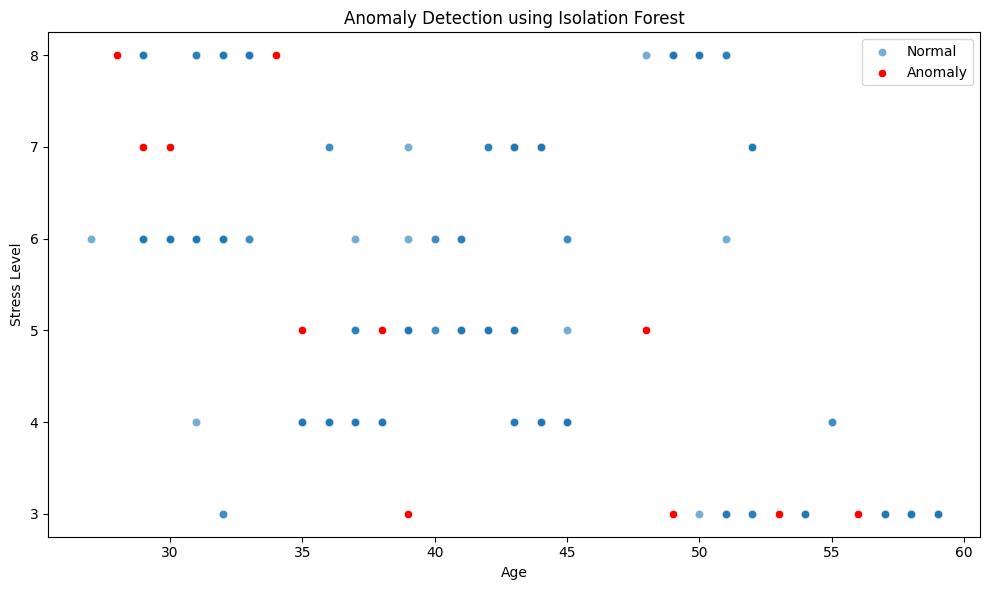

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

# Drop 'Person ID'
df.drop(columns=["Person ID"], inplace=True)

# Split 'Blood Pressure'
bp_split = df['Blood Pressure'].str.split('/', expand=True)
df['Systolic'] = bp_split[0].astype(int)
df['Diastolic'] = bp_split[1].astype(int)
df.drop(columns=["Blood Pressure"], inplace=True)

# Encode categorical features
label_cols = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']
label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Use only features (not for prediction)
X = df.copy()

# Initialize Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
X['Anomaly'] = iso_forest.fit_predict(X)

# Anomaly: -1 = outlier, 1 = normal
outliers = X[X['Anomaly'] == -1]
normals = X[X['Anomaly'] == 1]

# Count of anomalies
print(f"Total Outliers Detected: {len(outliers)}")

# Visualize outliers by Age and Stress Level
plt.figure(figsize=(10, 6))
sns.scatterplot(data=normals, x="Age", y="Stress Level", label="Normal", alpha=0.6)
sns.scatterplot(data=outliers, x="Age", y="Stress Level", label="Anomaly", color='red')
plt.title("Anomaly Detection using Isolation Forest")
plt.legend()
plt.tight_layout()
plt.show()
